In [2]:
!python -V

Python 3.7.6


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Compounding

In [4]:
def compounding(m, r, A=1, T=1):
    """
        A=1: face value assumed to be 1
        T=1: matures in one year
    """
    return A * ((1 + r / m)**(m*T))

In [5]:
for m in [1, 2, 4, 12, 365, 700]:
    print(compounding(m, r=0.04))

1.04
1.0404
1.04060401
1.0407415429197906
1.0408084931324164
1.0408095847402785


# Bond pricing formula

$$
\begin{aligned}
P(C, y, N, m)=P &=\sum_{i=1}^{N} \frac{C / m}{(1+y / m)^{i}}+\frac{1}{(1+y / m)^{N}} \\
&=\frac{C}{y}\left(1-\frac{1}{(1+y / m)^{N}}\right)+\frac{1}{(1+y / m)^{N}}
\end{aligned}
$$

- C: annualized coupon rate
- y: discounting rate
- N:=T * m: total number of payments
- m: how many times a coupon is paid in a year

In [6]:
def P(C, y, N, m):
    A = sum([(C/m)/(1+y/m)**i for i in range(1, N+1)])
    B = 1/(1+y/m)**N
    return A + B

In [7]:
C = 0.03
y = 0.02
T = 2
m = 2
N = T * m

In [8]:
P(C, y, N, m)

1.019509827758592

In [9]:
def P_closed_form(C, y, N, m):
    A = (C/y)*(1-(1/(1+y/m)**N))
    B = 1/(1+y/m)**N
    return A + B

In [10]:
P_closed_form(C, y, N, m)

1.019509827758592

In [11]:
# to compare numbers/float, use a tolerance bound, in case of precision loss
(P(C, y, N, m) - P_closed_form(C, y, N, m)) < 1e-10

True

### Bond price w.r.t to yield

In [12]:
# initialize pricing parameters
C = 0.03
y = 0.02
m = 2

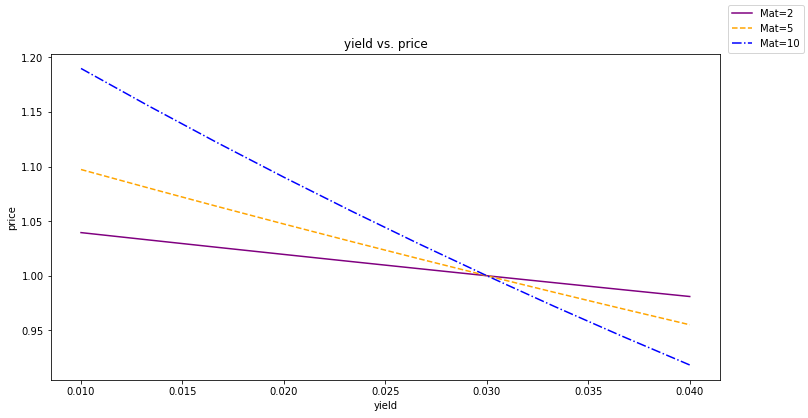

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

linestyles = ['-', '--', '-.']
colors = ['purple', 'orange', 'blue']

for i, T in enumerate([2, 5, 10]):
    N = T * m
    # compute price of bond w.r.t different yield
    yields = np.linspace(0.01, 0.04, 10)
    prices = [P_closed_form(C, y, N, m) for y in yields]
    # add scatter plot to plot
    ax.plot(yields, prices, color=colors[i], linestyle=linestyles[i], label=f'Mat={T}')

ax.set_xlabel('yield')
ax.set_ylabel('price')

fig.legend(loc='upper right')
ax.set_title('yield vs. price')
plt.show()

### Solve for yield: root search

#### [Newton's method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

In [45]:
from scipy.optimize import newton

In [15]:
# initialize pricing parameters except y
C = 0.03
T = 2
m = 2
N = T * m

def f(y, C=C, N=N, m=m):
    # 'root' finding
    return P(C, y, N, m)-1


In [16]:
newton(f, 0.9)

0.030000000000000138

### Bond Math Problems

The $\$ 1,000$ face value $A B C$ bond has a coupon rate of $6 \%,$ with interest paid semi-annually, and matures in 5 years. If the bond is priced to yield $8 \%,$ what is the bond's value today?
- $\mathrm{FV}=\$ 1,000$
- $CF=\$ 60 / 2=\$ 30$
- $N=5 \times 2=10$
- $i=8 \% / 2=4 \%$

In [36]:
C = 0.06
y = 0.08
T = 5
m = 2
N = T * m

In [37]:
1000 * P_closed_form(C, y, N, m)

918.8910422064497

The $\$ 1,000$ face value EFG bond has a coupon of $10 \%$ (paid semi-annually), matures in 4 years, and has current price of $\$ 1,140 .$ What is the EFG bond's yield to maturity?
- $\mathrm{FV}=\$ 1,000$
- $\mathrm{CF}=\$ 100 / 2=\$ 50$
- $N=4 \times 2=8$
- $P V=\$ 1,140$
- $i=3 \%$

In [38]:
C = 0.1
# y = 0.08
T = 4
m = 2
N = T * m
pv = 1140/1000

def f(y, C=C, N=N, m=m, pv=pv):
    # 'root' finding
    return P(C, y, N, m)-pv

In [55]:
newton(f, 0.3)

0.0601035028097677

## More on root-searching algorithms

### Newton's Method
- Convergence not guaranteed, if starting points far from root
- f'(x) must exists at root, and not equal to 0
- When it does converge, the convergence rate is quadratic

#### Taylor series expansion truncated at second term

$$
f(x)=f(a)+\frac{f^{\prime}(a)}{1 !}(x-a)+\frac{f^{\prime \prime}(a)}{2 !}(x-a)^{2}+\frac{f^{\prime \prime \prime}(a)}{3 !}(x-a)^{3}+\cdots
$$

i.e. 
$$
f(x)=f(a)+f^{\prime}(a)(x-a)+R_1
$$
where
$$
R_{1}=\frac{1}{2 !} f^{\prime \prime}\left(\xi_{n}\right)\left(\alpha-x_{n}\right)^{2}
$$
$\xi_{n}$ is in between $x_{n}$ and $\alpha$

#### Let f(x)=0, and re-arrange the term:
$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}
$$

### Practice:
Solve $x^2=37$ to the third digit

### Bisection Method
- f'(x) need not exist
- converges linearly
#### Algorithms:

1. starts with 2 bracketing levels $\left[x_{1}, x_{2}\right]$ where $f\left(x_{1}\right) \times f\left(x_{2}\right)<0$
2. At each step, one calculates $f\left(x_{\text {Mid }}\right):=\left(x_{1}+x_{2}\right) / 2$ and updates $x_{1}$ or $x_{2}$ as follows until $f\left(x_{\text {Mid }}\right)$ close to 0:
    - If $f\left(x_{\text {Mid }}\right)$ and $f\left(x_{1}\right)$ have the same sign, replace $x_{1}$ by $x_{\text {Mid. }}$
    - If $f\left(x_{M i d}\right)$ and $f\left(x_{2}\right)$ have the same sign, replace $x_{2}$ by $x_{\text {Mid }}$
    
<img src="bisection.png" alt="drawing" width="200"/>

# Duration (PV01, PVBP)

**PV01**
$$
P V 01=\frac{d P}{d y} \times 0.0001
$$

$$
\frac{d P}{d y}=\frac{C}{y^{2}}\left(\frac{1}{(1+y / m)^{N}}-1\right)+\frac{N}{m} \frac{C / y-1}{(1+y / m)^{N+1}}
$$

The relative or percentage change in price is known as the Modified Duration
$$
\text { Modified Duration }=\frac{1}{P} \frac{d P}{d y}
$$
and has unit of years.

**Present Value of 1 bp.** This is the change in price due to changing the coupon rate by 1 bp:
$$
P V B P=\frac{d P}{d C} \times 0.0001
$$
where
$$
\frac{d P}{d C}=\frac{1}{y}\left(1-\frac{1}{(1+y / m)^{N}}\right)
$$
and that
$$
P V B P=P_{A}(C=0.0001, y, N, m)=\frac{0.0001}{y}\left(1-\frac{1}{(1+y / m)^{N}}\right)
$$

**Extra**:
The Macaulay duration is defined as: $\quad \operatorname{MacD}=\frac{\sum_{i=1}^{n} t_{i} P V_{i}}{\sum_{i=1}^{n} P V_{i}}=\frac{\sum_{i=1}^{n} t_{i} P V_{i}}{V}=\sum_{i=1}^{n} t_{i} \frac{P V_{i}}{V}$

# Convexity

$$
\begin{aligned} \text { Convexity } &=\frac{d^{2} P}{d y^{2}}=\frac{N(N+1)}{m^{2}} \frac{1-C / y}{(1+y / m)^{N+2}} -\frac{2 C N /\left(m y^{2}\right)}{(1+y / m)^{N+1}}+\frac{2 C}{y^{3}}\left(1-\frac{1}{(1+y / m)^{N}}\right) \end{aligned}
$$

# Duration and Convexity as Coefficients in Taylor Expansion

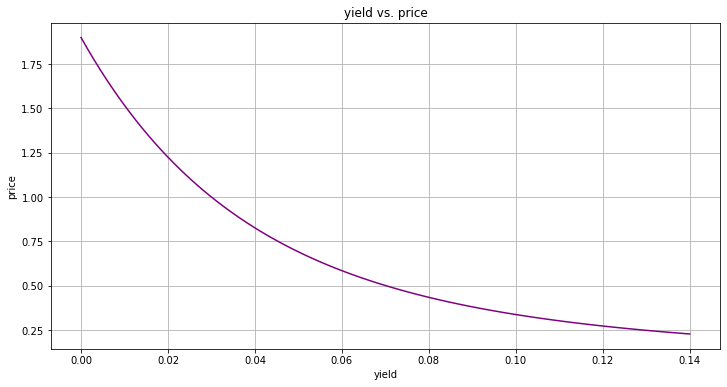

In [35]:
C = 0.03
m = 2
T = 30
N = T * m
    
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# compute price of bond w.r.t different yield
yields = np.linspace(1e-10, 0.14, 100)
prices = [P_closed_form(C, y, N, m) for y in yields]

# add scatter plot to plot
ax.plot(yields, prices, color='purple', linestyle='-')


ax.set_xlabel('yield')
ax.set_ylabel('price')

# fig.legend(loc='upper right')
ax.set_title('yield vs. price')
plt.grid()
plt.show()

For a function of one variable, $f(x)$, the Taylor Series Formula is:
$$
f(x+\Delta x)=f(x)+f^{\prime}(x) \Delta x+1 / 2 f^{\prime \prime}(x)(\Delta x)^{2}+\ldots+\frac{f^{(n)}(x)}{n !}(\Delta x)^{n}+\ldots
$$
First 2 terms of Taylor expansion plus remaining higher-order terms:
$$
f(x+\Delta x)-f(x)=f^{\prime}(x) \Delta x+1 / 2 f^{\prime \prime}(x)(\Delta x)^{2}+\text { Higher Order Terms. }
$$

Considering the price-yield formula for bonds, let $h$ be the number of bp's change in yields. We have
$$
\text{Price Change}\approx \mathrm{PV} 01 \times h+1 / 2 \times\text{Convexity}\times(h \times 0.0001)^{2} .
$$